# Base de dades MySQL

Crear base de dades amb MySQL.

**Exercici 1**

Crea una base de dades relacionals senzilla utilitzant MySQL i connecta-la a Python.

**Exercici 2**

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

**Exercici 3**

Genera algun gràfic que resumeixi les dades. 

### Exercisi 1

In [1]:
import mysql.connector

In [6]:
# Conexión al servidor
mydb = mysql.connector.connect(
    host="localhost",
    user="admin",
    password="Soledad.4",
    database="clinical"
)

In [8]:
# Comprovar conexión
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES")

for x in mycursor:
    print(x)

('tb_encounter',)
('tb_medical_services',)
('tb_orders',)
('tb_orders_catalog',)
('tb_patient',)
('tb_users',)


### Exercisi 2

In [11]:
import pandas as pd

In [16]:
# Tables
df_encounter = pd.read_sql('SELECT * FROM tb_encounter', con=mydb)
df_medical_services = pd.read_sql('SELECT * FROM tb_medical_services', con=mydb)
df_orders = pd.read_sql('SELECT * FROM tb_orders', con=mydb)
df_orders_catalog = pd.read_sql('SELECT * FROM tb_orders_catalog', con=mydb)
df_patient = pd.read_sql('SELECT * FROM tb_patient', con=mydb)
df_users = pd.read_sql('SELECT * FROM tb_users', con=mydb)

In [17]:
# Muestra
df_encounter.head()

,encounter_id,patient_id,encounter_type,arrival_dt,discharge_dt,med_service_id
0,65091,31,Consulta Externa,2016-04-12 08:59:00,2016-04-12 22:50:00,1
1,66971,31,Consulta Externa,2016-05-16 11:12:34,2016-05-16 18:20:00,5
2,75753,1,Consulta Externa,2016-06-16 12:26:59,2016-06-16 15:00:00,5
3,77276,11,Consulta Externa,2016-01-07 08:10:00,2016-01-07 15:30:00,1
4,78919,11,Urgencia,2018-07-26 13:23:55,2018-07-27 15:00:00,4


### Exercisi 3

In [43]:
# Info
Query = """
        SELECT OC.category, COUNT(*) as count
        FROM tb_orders as O
        INNER JOIN tb_orders_catalog OC ON O.order_code = OC.order_code
        GROUP BY OC.category
        """
Tipos = pd.read_sql(Query, con=mydb)

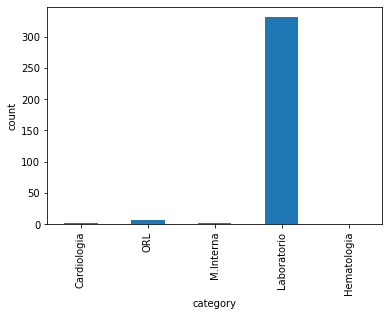

In [50]:
# Plot
Tipos.plot(kind="bar", x="category", ylabel="count", legend=False);

In [70]:
# Info
Query = """
        SELECT YEAR(E.arrival_dt) as año, COUNT(*) as count
        FROM tb_encounter as E
        GROUP BY YEAR(E.arrival_dt)
        ORDER BY año
        """
Visitas = pd.read_sql(Query, con=mydb)

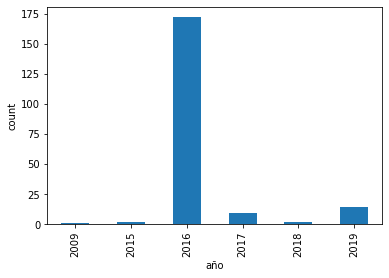

In [72]:
# Plot
Visitas.plot(kind="bar", x="año", ylabel="count", legend=False);